In [ ]:
# Needed Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as matplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Load the csv file
dfSteel = pd.read_csv('steel.csv')

In [ ]:
# - Exploratory Data Analysis (EDA)
# -- Clean the csv file
dfSteel = dfSteel.dropna()
# -- Checking the csv info
dfSteel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 311
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   carbon            303 non-null    float64
 1   manganese         303 non-null    float64
 2   silicone          303 non-null    float64
 3   chromium          303 non-null    float64
 4   nickel            303 non-null    float64
 5   molybdenum        303 non-null    float64
 6   vanadium          303 non-null    float64
 7   nitrogen          303 non-null    float64
 8   niobium           303 non-null    float64
 9   cobalt            303 non-null    float64
 10  tugnsten          303 non-null    float64
 11  aluminium         303 non-null    float64
 12  titanium          303 non-null    float64
 13  yield_strength    303 non-null    float64
 14  tensile_strength  303 non-null    float64
 15  elongation        303 non-null    float64
dtypes: float64(16)
memory usage: 40.2 KB


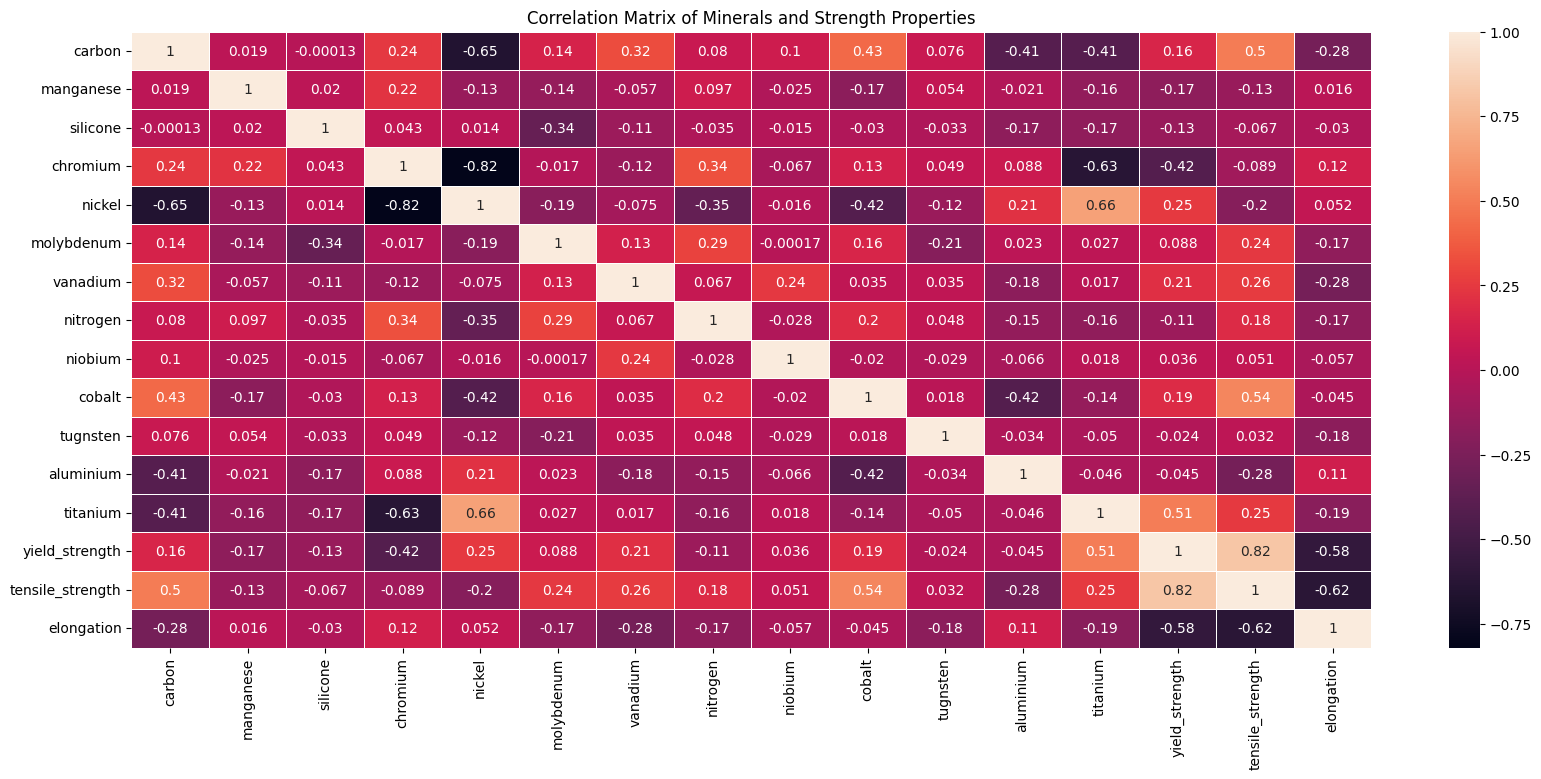

In [ ]:
# -- Visualise the relationships between mineral percentages and yield strength using scatter plots, histograms, or correlation matrices.
# --- Using Correlation matrix
matplot.figure(figsize=(20, 8))
corr_matrix = dfSteel.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
matplot.title('Correlation Matrix of Minerals and Strength Properties')
matplot.show()

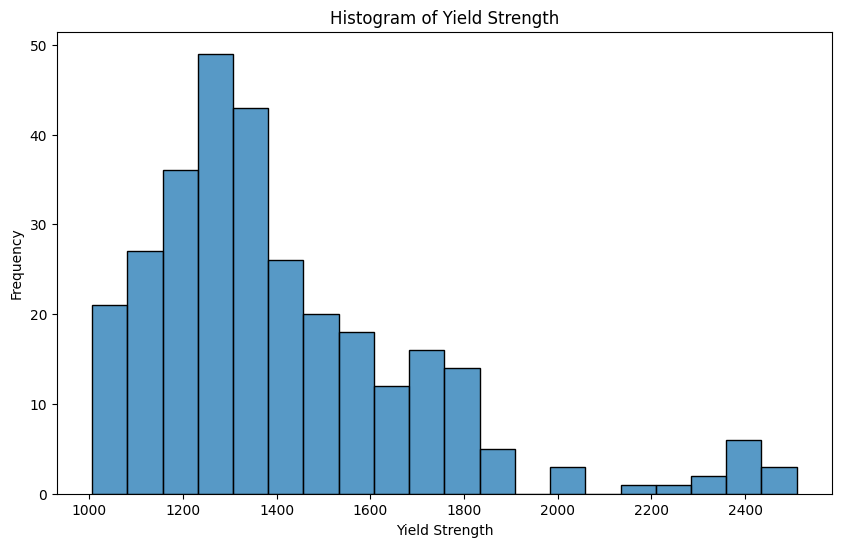

In [ ]:
# -- Visualise the relationships between mineral percentages and yield strength using scatter plots, histograms, or correlation matrices.
# --- Histogram of yield strength
matplot.figure(figsize=(10, 6))
sns.histplot(dfSteel['yield_strength'], bins=20)
matplot.title('Histogram of Yield Strength')
matplot.xlabel('Yield Strength')
matplot.ylabel('Frequency')
matplot.show()

In [ ]:
# - Model Selection and train the model
# -- Split dataset into train dataset and test dataset
x_data = dfSteel.drop('yield_strength', axis=1)
y_data = dfSteel['yield_strength']
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=24)

In [ ]:
# - Choose two appropriate machine learning models
# -- Chosing Gradient Boosting &  RandomForestRegressor

# --- Initialize models
grad_boost_model = GradientBoostingRegressor(random_state=24)
random_forest_model = RandomForestRegressor(random_state=24)

# --- Train models
grad_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=24)

In [ ]:
# Predict on test set
random_forest_prediction = random_forest_model.predict(X_test)
grad_boost_prediction = grad_boost_model.predict(X_test)

random_forest_mse = mean_squared_error(y_test, random_forest_prediction)
grad_boost_mse = mean_squared_error(y_test, grad_boost_prediction)

random_forest_r2 = r2_score(y_test, random_forest_prediction)
grad_boost_r2 = r2_score(y_test, grad_boost_prediction)

print(f"GBoost\t=>\tMSE:{grad_boost_mse}\tRsquared:{grad_boost_r2}")
print(f"RForest\t=>\tMSE:{random_forest_mse}\tRsquared: {random_forest_r2}")

GBoost	=>	MSE:5033.706680755296	Rsquared:0.9563521523878352
RForest	=>	MSE:5505.178768010996	Rsquared: 0.9522639638772488


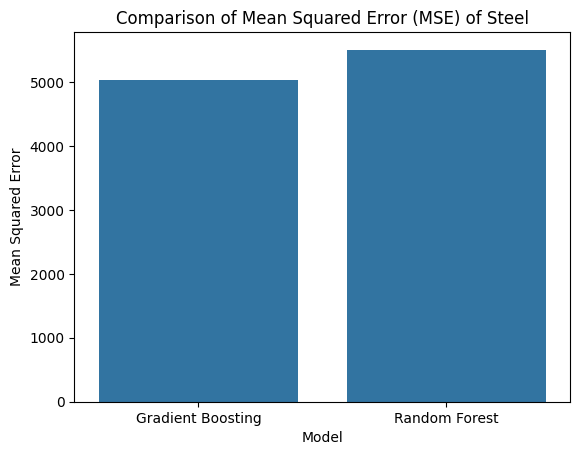

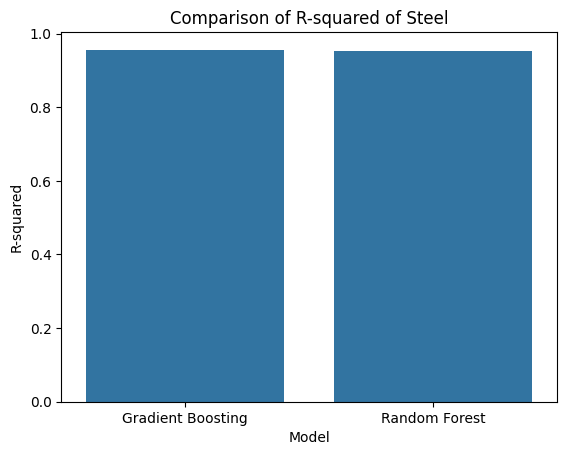

In [ ]:
# Create a DataFrame for comparison
results = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Random Forest'],
    'MSE': [grad_boost_mse, random_forest_mse],
    'R-squared': [grad_boost_r2, random_forest_r2]
})

# Plot the comparison of MSE
matplot.figure()
sns.barplot(x='Model', y='MSE', data=results)
matplot.title('Comparison of Mean Squared Error (MSE) of Steel')
matplot.xlabel('Model')
matplot.ylabel('Mean Squared Error')
matplot.show()

# Plot the comparison of R-squared
matplot.figure()
sns.barplot(x='Model', y='R-squared', data=results)
matplot.title('Comparison of R-squared of Steel')
matplot.xlabel('Model')
matplot.ylabel('R-squared')
matplot.show()

# From the plot, we can see the MSE level is better for Gradient Boosting since is the lowest value.
# From the plot, we can see the R-squared level is better for Gradient Boosting since is the nearest to the 1 value.